
## 1- Analyse via r√©gression lin√©aire simple :  
- **Question** :  Quel est l'effet des d√©penses en √©ducation (% du PIB) sur le ratio filles/gar√ßons des inscriptions au primaire (%) ?
### Indicateurs s√©lectionn√©s :  
- **Depenses_en_education_PIB**  : Part des d√©penses publiques allou√©e √† l'√©ducation en pourcentage du PIB. 
- **inscriptions au primaire**  :  le ratio filles/gar√ßons des inscriptions au primaire (%).

### Hypoth√®se :
- **H‚ÇÄ** : Les d√©penses en √©ducation n'ont pas d'impact significatif sur  le ratio filles/gar√ßons des inscriptions au primaire (%).
- **H‚ÇÅ** : Les d√©penses en √©ducation ont un impact significatif sur le ratio filles/gar√ßons des inscriptions au primaire (%).
- Si la p-valeur est significative, H‚ÇÄ est rejet√©e, ce qui confirme l'impact des d√©penses en √©ducation sur  le ratio filles/gar√ßons des inscriptions au primaire (%).

# √âtape 1 : Pr√©paration des Donn√©es

1-Importez les biblioth√®ques n√©cessaires, telles que numpy, pandas, statsmodels, seaborn, matplotlib.pyplot, et scipy.stats.

In [62]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.diagnostic import het_white

2-Charger les donn√©es √† partir d'un fichier Excel nomm√© "data_cleaned.csv" et stock√©es dans un DataFrame.

In [63]:
data = pd.read_csv('data_cleaned.csv')
print(data.head())

       Country     PIB_total  la concentration moyenne annuelle en PM2,5  \
0  Afghanistan  1.995593e+10                                   46.087094   
1      Armenia  1.264170e+10                                   30.579633   
2   Azerbaijan  4.269300e+10                                   21.727000   
3      Bahrain  3.583763e+10                                   58.495063   
4   Bangladesh  3.739794e+11                                   42.381376   

   inscriptions au primaire  Consommation d‚Äô√©nergies renouvelables  \
0                   1.01058                                   18.2   
1                   1.01115                                    8.4   
2                   1.04425                                    1.3   
3                   1.01058                                    0.0   
4                   1.09302                                   27.2   

   PIB_par_habitant  Depenses_en_education_PIB  Esperance_de_vie  \
0        510.787063                   5.062039     

# √âtape 2 : S√©lection des variables

D√©finir les variables 'Depenses_en_education_PIB' et 'Inscriptions √† l‚Äô√©cole' comme variables ind√©pendante (X) et d√©pendante (y).

In [64]:
X = data['Depenses_en_education_PIB']
y = data['inscriptions au primaire']

X = sm.add_constant(X)

# √âtape 3 : Nuage de points

Un nuage de points est cr√©√© pour visualiser la relation entre Depenses en education et Inscriptions √† l‚Äô√©cole. Le nuage de points est affich√© avec des axes et une l√©gende.

In [65]:
# Cr√©er un nuage de points
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depenses_en_education_PIB', y='inscriptions au primaire', data=data)

# Ajouter des titres et des labels
plt.title('Nuage de points : Depenses en education PIB vs inscriptions au primaire')
plt.xlabel('Depenses en education')
plt.ylabel('inscriptions au primaire')
plt.legend(['inscriptions'])
plt.grid(True)

# Afficher le graphique
plt.show()

En observant uniquement les points, il n'y a pas de relation √©vidente. Les points semblent dispers√©s de mani√®re al√©atoire, ce qui sugg√®re une faible ou inexistante corr√©lation lin√©aire entre les deux variables.

La majorit√© des points se trouvent autour de 100% sur l'axe Y, ce qui indique que, dans la plupart des pays, le ratio filles/gar√ßons est proche de l'√©galit√©.

# √âtape 4 : Ajustement du mod√®le de r√©gression lin√©aire

Un mod√®le de r√©gression lin√©aire simple est ajust√© en utilisant la m√©thode des moindres carr√©s ordinaires (OLS) de la biblioth√®que statsmodels.

In [66]:
model = sm.OLS(y, X).fit()

# √âtape 5 : Affichage du nuage de points avec la droite de r√©gression

Le nuage de points est affich√© avec une droite de r√©gression (en rouge) qui repr√©sente la relation lin√©aire entre Advertisements et les Sales.

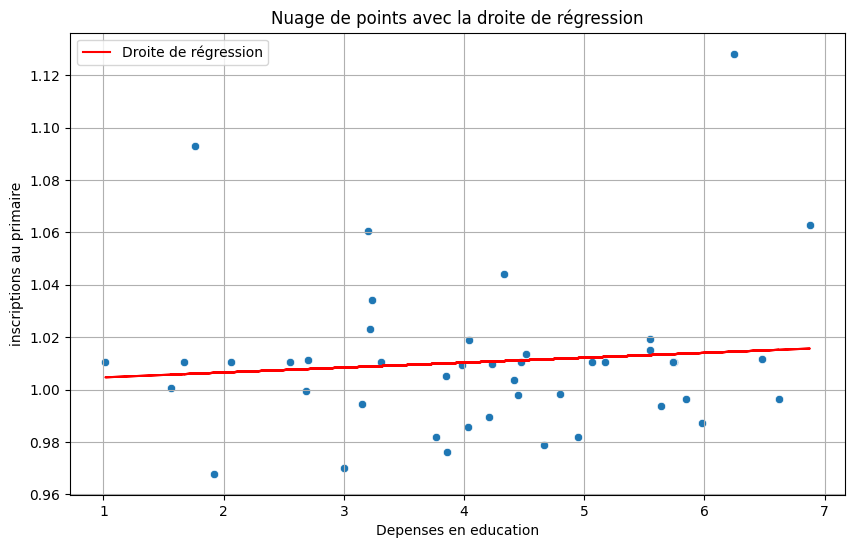

In [67]:
# Pr√©dire les valeurs de y √† partir du mod√®le
y_pred = model.predict(X)

# Cr√©er le nuage de points avec la droite de r√©gression
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Depenses_en_education_PIB', y='inscriptions au primaire', data=data)
plt.plot(data['Depenses_en_education_PIB'], y_pred, color='red', label='Droite de r√©gression')

# Ajouter des titres et des labels
plt.title('Nuage de points avec la droite de r√©gression')
plt.xlabel('Depenses en education')
plt.ylabel('inscriptions au primaire')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

Les points sont tr√®s √©loign√©s de la droite de r√©gression, ce qui refl√®te une relation lin√©aire tr√®s faible

# √âtape 6 : Tests de r√©gression

Plusieurs tests sont effectu√©s pour √©valuer la qualit√© du mod√®le de r√©gression :
    -Le test de Durbin-Watson est utilis√© pour d√©tecter l'autocorr√©lation des r√©sidus.
    -Le test de White est utilis√© pour d√©tecter l'h√©t√©rosc√©dasticit√© des r√©sidus.
    -Le test de normalit√© de Shapiro-Wilk est utilis√© pour √©valuer la normalit√© des r√©sidus.

In [68]:
# Test de Durbin-Watson
dw = sm.stats.durbin_watson(model.resid)
print(f'Test de Durbin-Watson: {dw}')

Test de Durbin-Watson: 2.085205643745853


DW=1.7637 :
La valeur est tr√®s proche de 2, ce qui sugg√®re que les r√©sidus du mod√®le de r√©gression n'ont pas d'autocorr√©lation significative.
Cela est un bon indicateur de validit√© pour le mod√®le, car une autocorr√©lation importante pourrait biaiser les r√©sultats de l'estimation des coefficients.

In [69]:
# Test de White pour l'h√©t√©rosc√©dasticit√©
white_test = het_white(model.resid, model.model.exog)
labels = ['LM statistic', 'p-value', 'f-statistic', 'f p-value']
print(dict(zip(labels, white_test)))

{'LM statistic': 2.9182687878507436, 'p-value': 0.23243738688931007, 'f-statistic': 1.4563004605469434, 'f p-value': 0.24462608803860333}


Ici, le p-value est sup√©rieur √† 0.05, donc nous ne rejetons pas l'hypoth√®se nulle d'homosc√©dasticit√©. Cela signifie qu'il n'y a pas de preuve d'h√©t√©rosc√©dasticit√©.

In [70]:
# Test de normalit√© de Shapiro-Wilk 
shapiro_test = stats.shapiro(model.resid)
print(f'Test de Shapiro-Wilk: {shapiro_test}')

Test de Shapiro-Wilk: ShapiroResult(statistic=0.8132222955157115, pvalue=4.705283622899713e-06)


Statistique de test : Une valeur proche de 1 indique que les r√©sidus sont normalement distribu√©s, tandis qu'une valeur plus petite indique une d√©viation par rapport √† la normalit√©. Ici, la statistique est de 0.8132, ce qui sugg√®re une certaine d√©viation des r√©sidus par rapport √† la normalit√©.

p-value : Une p-value tr√®s faible (inf√©rieure √† 0.05) indique que l'hypoth√®se nulle (les r√©sidus suivent une distribution normale) est rejet√©e. Dans ce cas, la p-value est 4.7053e-06, ce qui est largement inf√©rieur √† 0.05, indiquant qu'il y a une forte preuve statistique que les r√©sidus ne suivent pas une distribution normale.

# √âtape 7 : R√©sum√© du mod√®le

Le r√©sum√© du mod√®le de r√©gression lin√©aire est affich√©, montrant les coefficients, les statistiques de test et d'autres informations li√©es au mod√®le.

In [71]:
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     inscriptions au primaire   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                 -0.014
Method:                       Least Squares   F-statistic:                    0.3865
Date:                      Mon, 23 Dec 2024   Prob (F-statistic):              0.537
Time:                              20:25:30   Log-Likelihood:                 95.352
No. Observations:                        45   AIC:                            -186.7
Df Residuals:                            43   BIC:                            -183.1
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

R-squared (R¬≤) : 0.009, ce qui indique que seulement 0.9% de la variance des inscriptions au primaire est expliqu√©e par les d√©penses en √©ducation en pourcentage du PIB. Cela sugg√®re que le mod√®le n'explique pas bien la relation entre ces deux variables.

F-statistic : 0.3865 avec une p-value de 0.537. Cela indique que la relation entre les d√©penses en √©ducation et les inscriptions au primaire n'est pas statistiquement significative. En d'autres termes, les d√©penses en √©ducation ne semblent pas avoir un impact notable sur les inscriptions au primaire dans ce mod√®le.

# √âtape 8 : Histogramme des r√©sidus avec courbe de distribution normale

Un histogramme des r√©sidus est affich√© pour visualiser leur distribution. Il est superpos√© avec une courbe de distribution normale pour √©valuer la normalit√© des r√©sidus.

In [72]:
# Calculer les r√©sidus
residus = model.resid

# Cr√©er l'histogramme des r√©sidus
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, stat="density", bins=30)

# Ajouter une courbe de distribution normale
mu, std = stats.norm.fit(residus)  # Fit de la normale
xmin, xmax = plt.xlim()  # Limites x pour la courbe
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)  # PDF de la normale
plt.plot(x, p, 'r', linewidth=2, label='Courbe de distribution normale')

# Ajouter des titres et des labels
plt.title('Histogramme des r√©sidus avec courbe de distribution normale')
plt.xlabel('R√©sidus')
plt.ylabel('Densit√©')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.show()

On observe que les r√©sidus ne suivent pas strictement une distribution normale. La courbe bleue (KDE estim√©e des r√©sidus) ne s'aligne pas compl√®tement avec la courbe rouge (courbe de distribution normale ajust√©e). 


# √âtape 9 : Calcul de l'Erreur quadratique moyenne (MSE).

Calculez en prenant la moyenne des carr√©s des √©carts entre les valeurs pr√©dites par le mod√®le de r√©gression et les valeurs r√©elles de la variable d√©pendante et interpr√©ter le r√©sultat. (Utilisez la biblio scikit ‚Äì learn ou bien Numpy)

In [76]:
from sklearn.metrics import mean_squared_error

# Pr√©dire les valeurs de y √† partir du mod√®le
y_pred = model.predict(X)

# Calculer l'Erreur quadratique moyenne (MSE)
mse = mean_squared_error(y, y_pred)
print(f'Erreur Quadratique Moyenne (MSE): {mse}')

Erreur Quadratique Moyenne (MSE): 0.0008453718122705221


Une MSE proche de z√©ro indique que le mod√®le fait des pr√©dictions proches des valeurs observ√©es.
La valeur obtenue (0.000845) est relativement faible. Cela sugg√®re que les √©carts entre les valeurs pr√©dites et observ√©es sont petits en termes absolus.


# √âtape 10 : Coefficient de d√©termination (R¬≤).

Calculez Le coefficient de d√©termination R¬≤ et interpr√©ter le r√©sultat.

In [78]:
# Coefficient de d√©termination (R¬≤)
r_squared = model.rsquared
print(f'Coefficient de d√©termination (R¬≤): {r_squared}')

Coefficient de d√©termination (R¬≤): 0.008908807336358349


Cela signifie que le mod√®le explique seulement 0,89 % de la variance dans les donn√©es de la variable cible (ùë¶, les inscriptions au primaire). Autrement dit, une grande partie de la variation des donn√©es reste inexpliqu√©e par les d√©penses en √©ducation (ùëã).

## 2- Analyse via un Test T :
**Question** : Existe-t-il des diff√©rences significatives dans les d√©penses en √©ducation entre les pays d√©velopp√©s et √©mergents ?
## Indicateurs s√©lectionn√©s :
**Niveau_de_d√©veloppement** : Cat√©gorie des pays (d√©velopp√©s ou √©mergents).
**D√©penses_en_√©ducation_PIB** : Part des d√©penses publiques allou√©e √† l'√©ducation en pourcentage du PIB.
## Hypoth√®ses :
**H‚ÇÄ (Hypoth√®se nulle)** : Les moyennes des d√©penses en √©ducation (en % du PIB) sont √©gales entre les pays d√©velopp√©s et √©mergents.
**H‚ÇÅ (Hypoth√®se alternative)** : Les moyennes des d√©penses en √©ducation (en % du PIB) ne sont

Diviser les donn√©es en deux groupes

In [82]:
group_developped = data[data['Niveau_de_developpement'] == '√âlev√©']['Depenses_en_education_PIB']
group_emerging = data[data['Niveau_de_developpement'] != '√âlev√©']['Depenses_en_education_PIB']

In [84]:
print('developped :', group_developped.mean()) # On affiche la moyenne de l'√©chantillon pour les pays d√©velopp√©s
print('emerging :', group_emerging.mean()) # On affiche la moyenne de l'√©chantillon pour les pays √©mergents

developped : 4.615154981370749
emerging : 3.9954038336866384


In [85]:
# test de normalit√© avec le test de Shapiro-Wilk
from scipy.stats import shapiro

shapiro_developped = shapiro(group_developped)
shapiro_emerging = shapiro(group_emerging)

print("Shapiro-Wilk test pour les pays d√©velopp√©s :", shapiro_developped)
print("Shapiro-Wilk test pour les pays √©mergents :", shapiro_emerging)

Shapiro-Wilk test pour les pays d√©velopp√©s : ShapiroResult(statistic=0.9481887508637791, pvalue=0.57111528549601)
Shapiro-Wilk test pour les pays √©mergents : ShapiroResult(statistic=0.9637584379222639, pvalue=0.34683122855915866)


Pays d√©velopp√©s : pvalue=0.57, on ne rejette pas ùêª0(les donn√©es suivent une distribution normale).
Pays √©mergents : pvalue=0.34, on ne rejette pas ùêª0(les donn√©es suivent √©galement une distribution normale).
Les deux groupes suivent une distribution normale, ce qui permet d'appliquer le test T de Student.

In [90]:
import scipy.stats as st

t_stat , p_valeur = st.ttest_ind(group_developped, group_emerging) # On fait un test de Student bilateral √† 2 √©chantillons

print('stat=%.3f, p=%.3f' % (t_stat, p_valeur))
alpha = 0.05 # On fixe le seuil de signification √† 5%

if p_valeur > alpha:
    print('On accepte H0 : les moyennes sont √©gales')
else:
    print('On rejette H0 : les moyennes sont diff√©rentes')
    


stat=1.275, p=0.209
On accepte H0 : les moyennes sont √©gales


La p-value=0.209 est sup√©rieure au seuil Œ±=0.05.

Cela signifie que nous ne rejetons pas l‚Äôhypoth√®se nulle (ùêª0).

Il n‚Äôy a pas de diff√©rence significative entre les moyennes des d√©penses en √©ducation (% PIB) des pays d√©velopp√©s et des pays √©mergents.

Bien que la moyenne des pays d√©velopp√©s (4.62 %) soit l√©g√®rement sup√©rieure √† celle des pays √©mergents (4.00 %), cette diff√©rence n'est pas statistiquement significative.

Cela sugg√®re qu‚Äôen termes de d√©penses en √©ducation (% PIB), les pays d√©velopp√©s et √©mergents ne pr√©sentent pas une distinction nette dans cet √©chantillon.

## 3- Analyse via r√©gression lin√©aire multiple :
**Question** : Quels facteurs contribuent  √† la consommation d‚Äô√©nergies renouvelables (% de la consommation totale d‚Äô√©nergie)?
## Indicateurs s√©lectionn√©s :
**Consommation d‚Äô√©nergies renouvelables** : Consommation d‚Äô√©nergies renouvelables (% de la consommation totale d‚Äô√©nergie).
**PIB_par_habitant**: e produit int√©rieur brut (PIB) repr√©sente la valeur totale des biens et services produits dans un pays sur une p√©riode donn√©e (g√©n√©ralement une ann√©e).
**Acc√®s √† l'√©lectricit√©** : Pourcentage de la population ayant acc√®s √† l'√©lectricit√©.
## Hypoth√®ses :
**H‚ÇÄ (Hypoth√®se nulle)** : Aucun des facteurs s√©lectionn√©s n‚Äôa d‚Äôeffet significatif sur la consommation d‚Äô√©nergies renouvelables.
**H‚ÇÅ (Hypoth√®se alternative)** : Au moins un des facteurs s√©lectionn√©s a un effet significatif sur la consommation d‚Äô√©nergies renouvelables.


# √âtape 1 : Pr√©paration des Donn√©es

1-Importez tous les biblioth√®ques n√©cessaires. (par example : numpy, pandas, statsmodels, seaborn, matplotlib.pyplot, et scipy.stats...)

In [137]:
import pandas as pd
import matplotlib.pyplot as mb
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


2-Charger les donn√©es √† partir d'un fichier Excel nomm√© "data_cleaned.csv" et stock√©es dans un DataFrame.

In [138]:
data_multible= pd.read_csv('data_cleaned.csv')
data_multible.head()

Country     PIB_total  la concentration moyenne annuelle en PM2,5  \
0  Afghanistan  1.995593e+10                                   46.087094   
1      Armenia  1.264170e+10                                   30.579633   
2   Azerbaijan  4.269300e+10                                   21.727000   
3      Bahrain  3.583763e+10                                   58.495063   
4   Bangladesh  3.739794e+11                                   42.381376   

   inscriptions au primaire  Consommation d‚Äô√©nergies renouvelables  \
0                   1.01058                                   18.2   
1                   1.01115                                    8.4   
2                   1.04425                                    1.3   
3                   1.01058                                    0.0   
4                   1.09302                                   27.2   

   PIB_par_habitant  Depenses_en_education_PIB  Esperance_de_vie  \
0        510.787063                   5.062039            62.575   
1       4268.680933                   2.705560            72.173   
2       4229.910649                   4.332050            66.868   
3      24342.844455                   2.552375            79.174   
4       2248.850788                   1.765281            71.968   

   Depenses_en_sante_par_habitant  Taux_mortalite_infantile  ...  \
0                       80.288055                      61.6  ...   
1                      552.000000                      11.3  ...   
2                      243.000000                      19.7  ...   
3                     1105.324829                       6.9  ...   
4                       50.664131                      31.0  ...   

   Acces_internet  Croissance_economique  Croissance_PIB_par_habitant  \
0         18.4000              -2.351101                    -5.382515   
1         76.5077              -7.200000                    -7.168665   
2         84.6000              -4.300000                    -4.952702   
3         99.6710              -5.911363                    -5.173074   
4         36.1091               3.448018                     2.586478   

   Ratio_dette_PIB  Investissements_directs_etrangers  Emplois_agriculture  \
0        74.400018                           0.064994            45.983408   
1        63.401214                           0.463409            52.383909   
2        22.189999                           1.187904            36.312789   
3       111.598089                           2.849732             0.935136   
4        74.400018                           0.407860            38.123203   

   Acces_electricite_categorise  Niveau_de_developpement  \
0                         √âlev√©                   Faible   
1                         √âlev√©            Interm√©diaire   
2                         √âlev√©            Interm√©diaire   
3                         √âlev√©                    √âlev√©   
4                         √âlev√©                   Faible   

   Acces_eau_potable_categorise  Taux_pauvrete_categorise  
0                        Mod√©r√©                    Faible  
1                         √âlev√©                    Faible  
2                         √âlev√©                    Faible  
3                         √âlev√©                    Faible  
4                         √âlev√©                    Faible  

[5 rows x 24 columns]

# √âtape 2 : S√©lection des variables.

In [151]:
Y = data_multible["Consommation d‚Äô√©nergies renouvelables"]
X = data_multible[["PIB_par_habitant", "Acces_electricite"]]

# √âtape 3 : Nuage de points

In [152]:
grp = mb.figure(figsize=(16, 10))

ax = grp.add_subplot(121, projection='3d')

ax.scatter(data_multible["PIB_par_habitant"], data_multible["Acces_electricite"], data_multible["Consommation d‚Äô√©nergies renouvelables"], c='r', marker='^')

ax.set_xlabel('PIB_par_habitant')
ax.set_ylabel('Acces_electricite')
ax.set_zlabel('Consommation d‚Äô√©nergies renouvelables')

mb.title('Graphe de nuage des points')

mb.show()


les points semblent former un plan ou une tendance claire, cela sugg√®re une relation entre les variables

# √âtape 4 : Ajustement du mod√®le de r√©gression lin√©aire

Un mod√®le de r√©gression lin√©aire multiple est ajust√© en utilisant la m√©thode des moindres carr√©s ordinaires (OLS) de la biblioth√®que statsmodels.

In [153]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X[["PIB_par_habitant", "Acces_electricite"]])

X = sm.add_constant(X_scaled)
model = sm.OLS(Y, X).fit()
model.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                                      OLS Regression Results                                     
=================================================================================================
Dep. Variable:     Consommation d‚Äô√©nergies renouvelables   R-squared:                       0.232
Model:                                               OLS   Adj. R-squared:                  0.195
Method:                                    Least Squares   F-statistic:                     6.334
Date:                                   Tue, 24 Dec 2024   Prob (F-statistic):            0.00394
Time:                                           11:54:32   Log-Likelihood:                -195.24
No. Observations:                                     45   AIC:                             396.5
Df Residuals:                                         42   BIC:                             401.9
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4622      2.860      6.105      0.000      11.690      23.235
x1            -7.4604      2.985     -2.500      0.016     -13.483      -1.437
x2            -5.1183      2.985     -1.715      0.094     -11.141       0.905
==============================================================================
Omnibus:                       13.315   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.506
Skew:                           1.025   Prob(JB):                     0.000430
Kurtosis:                       5.016   Cond. No.                         1.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared (R¬≤) = 0.232 :
23,2 % de la variabilit√© dans la consommation d‚Äô√©nergies renouvelables est expliqu√©e par le mod√®le.
Bien que ce pourcentage soit relativement faible, il indique que d'autres facteurs non inclus pourraient √©galement contribuer significativement.

Prob (F-statistic) = 0.00394 :
Le mod√®le global est statistiquement significatif au seuil de 5 %, ce qui signifie que les variables explicatives combin√©es ont un effet sur la consommation d‚Äô√©nergies renouvelables.

# √âtape 5 : Affichage du nuage de points avec la droite de r√©gression.

In [142]:
# Effectuez les pr√©dictions
Y_predict = model.predict(X)

# Cr√©ez une figure avec une taille personalis√©e
grp = mb.figure(figsize=(14, 9))

# Ajoute un sous-graphique 3D
ax = grp.add_subplot(1, 2, 1, projection="3d")
                      
# Nuage de points avec Les donn√©es r√©elles 
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], data_multible["Consommation d‚Äô√©nergies renouvelables"], c='r', marker='^')

# Ajoutez des √©tiquettes aux axes ax. set.
ax.set_xlabel ('PIB_par_habitant')
ax.set_ylabel('Acces_electricite')
ax.set_zlabel('Consommation d‚Äô√©nergies renouvelables')


mb.title('Graphe de la droite de r√©gression')


# Trac√© de la surface triangul√©e avec Les pr√©dictions 
ax.plot_trisurf(X_scaled[:, 0], X_scaled[:, 1], Y_predict)

# Affichez la figure
mb.show()







Les points rouges repr√©sentent les donn√©es r√©elles observ√©es de la consommation d‚Äô√©nergies renouvelables en fonction des deux variables explicatives : PIB par habitant (x1) et acc√®s √† l'√©lectricit√© (x2).

Une surface triangul√©e (bleue ou une couleur par d√©faut) repr√©sente les pr√©dictions issues du mod√®le de r√©gression lin√©aire.

# √âtape 6 : Tests de r√©gression

Plusieurs tests sont effectu√©s pour √©valuer la qualit√© du mod√®le de r√©gression : -Le test de Durbin-Watson est utilis√© pour d√©tecter l'autocorr√©lation des r√©sidus. -Le test de White est utilis√© pour d√©tecter l'h√©t√©rosc√©dasticit√© des r√©sidus. -Le test de normalit√© de Shapiro-Wilk est utilis√© pour √©valuer la normalit√© des r√©sidus.
(Interpr√©ter les r√©sultats)

In [143]:
# Test de Durbin-Watson
# Calculez la statistique Durbin-Watson (DW)
dw = sm.stats.stattools.durbin_watson(model.resid)

print(f"Statistique Durbin-Watson (DW) : {dw:.2f}")


Statistique Durbin-Watson (DW) : 1.96


La statistique Durbin-Watson calcul√©e est 1.96, ce qui est proche de 2. Cela sugg√®re qu'il n'y a pas de preuve √©vidente d'autocorr√©lation des r√©sidus dans ce mod√®le. 

In [155]:
# Test de White pour l'h√©t√©rosc√©dasticit√©

from statsmodels.stats.diagnostic import het_white


# Effectuer le test de white
white_test_statistic, white_test_P_value, fstat, f_P_value = het_white(model.resid, X)


print(f"Statistique de White -- statistique du test : {white_test_statistic: 4f}")
print(f"Statistique de White -- valeur p : {white_test_P_value: 4f}")

if white_test_P_value < 0.05:
     print("h√©t√©rosc√©dasticit√© d√©t√©ct√©e : : la variance des r√©sidus n'est pas constante")
else:
     print("Aucune h√©t√©rosc√©dasticit√© significative d√©t√©ct√©e")


Statistique de White -- statistique du test :  8.273054
Statistique de White -- valeur p :  0.141815
Aucune h√©t√©rosc√©dasticit√© significative d√©t√©ct√©e


La valeur p est sup√©rieure √† 0,05 (niveau de signification usuel), ce qui indique que nous ne rejetons pas l'hypoth√®se nulle d'homosc√©dasticit√©.

Cela signifie que la variance des r√©sidus est constante, et il n'y a pas de preuve significative d'h√©t√©rosc√©dasticit√© dans le mod√®le.

Le mod√®le respecte l'une des hypoth√®ses fondamentales de la r√©gression lin√©aire, √† savoir que les r√©sidus ont une variance constante.

# √âtape 7 : R√©sum√© du mod√®le

Le r√©sum√© du mod√®le de r√©gression lin√©aire est affich√©, montrant les coefficients, les statistiques de test et d'autres informations li√©es au mod√®le.

In [145]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Ajout d'une constante (intercept) pour le mod√®le
X = sm.add_constant(X)

# S√©paration des donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# Cr√©ation du mod√®le de r√©gression lin√©aire avec statsmodels
model = sm.OLS(Y_train, X_train)

# Ajustement du mod√®le
results = model.fit()

# Affichage du r√©sum√© du mod√®le
print(results.summary())


                                      OLS Regression Results                                     
Dep. Variable:     Consommation d‚Äô√©nergies renouvelables   R-squared:                       0.415
Model:                                               OLS   Adj. R-squared:                  0.373
Method:                                    Least Squares   F-statistic:                     9.918
Date:                                   Tue, 24 Dec 2024   Prob (F-statistic):           0.000554
Time:                                           11:30:33   Log-Likelihood:                -130.89
No. Observations:                                     31   AIC:                             267.8
Df Residuals:                                         28   BIC:                             272.1
Df Model:                                              2                                         
Covariance Type:                               nonrobust                                         
                 

R-squared = 0.415 :Environ 41,5 % de la variabilit√© dans la consommation d‚Äô√©nergies renouvelables est expliqu√©e par le PIB par habitant et l'acc√®s √† l'√©lectricit√©.

Adj. R-squared = 0.373 : Ajust√© pour le nombre de variables, ce qui le rend l√©g√®rement plus conservateur.

F-statistic = 9.918, Prob(F-statistic) = 0.000554 :Le mod√®le global est statistiquement significatif, indiquant que les variables explicatives ont un effet combin√© sur la variable d√©pendante.

Acc√®s √† l'√©lectricit√© est un facteur significatif, et son impact est n√©gatif sur la consommation d‚Äô√©nergies renouvelables.

PIB par habitant pr√©sente une tendance n√©gative, mais cet effet n‚Äôest pas statistiquement significatif.

Le mod√®le capture une part mod√©r√©e de la variabilit√© des donn√©es (41,5 %), mais une part importante reste inexpliqu√©e.

# √âtape 8 : Calcul de l'Erreur quadratique moyenne (MSE) et Erreur Quadratique Moyenne (RMSE).

Calculez en prenant la moyenne des carr√©s des √©carts entre les valeurs pr√©dites par le mod√®le de r√©gression et les valeurs r√©elles de la variable d√©pendante et interpr√©ter le r√©sultat. (Utilisez la biblio scikit ‚Äì learn ou bien Numpy)

In [156]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Pr√©dictions sur l'ensemble de test
Y_predict_test = results.predict(X_test)

# Calcul du Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_predict_test)
print(f"Mean Squared Error (MSE): {mse}")

# Calcul du Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")



Mean Squared Error (MSE): 1494.6968946747934
Root Mean Squared Error (RMSE): 38.66131004861053


Plus le MSE est faible, plus le mod√®le est pr√©cis. Ici, une valeur √©lev√©e (1494.70) indique que le mod√®le pr√©sente une erreur moyenne importante dans ses pr√©dictions.

Avec un RMSE de 38.66, cela signifie que les pr√©dictions s'√©cartent en moyenne de 38,66 % sur l'√©chelle de la consommation d'√©nergies renouvelables.

# √âtape 8 : Calcul de  Coefficient de d√©termination (R¬≤).

In [158]:
import numpy as np

# Pr√©dictions sur l'ensemble d'entra√Ænement
Y_train_predict = results.predict(X_train)

# Calcul du SSE (Sum of Squares Error) et SST (Total Sum of Squares)
sse = np.sum((Y_train - Y_train_predict) ** 2)  # Erreur des r√©sidus
sst = np.sum((Y_train - np.mean(Y_train)) ** 2)  # Variance totale

# Calcul du R¬≤
r_squared_manual = 1 - (sse / sst)
print(f'Coefficient de d√©termination calcul√© (R¬≤): {r_squared_manual}')


Coefficient de d√©termination calcul√© (R¬≤): 0.4146680579336215


R2 =0.4147, ce qui signifie que 41,47 % de la variabilit√© de la consommation d‚Äô√©nergies renouvelables (Y) est expliqu√©e par les variables ind√©pendantes (X).
Reste de la variabilit√© :

Environ 58,53 % de la variabilit√© n'est pas expliqu√©e par le mod√®le, ce qui indique qu'il existe des facteurs ou des relations non inclus dans l'analyse actuelle.